In [112]:
fname = "input"
voxels = set(map(lambda x: tuple(map(int,x.split(","))),open(fname).read().split()))

In [113]:
voxels

{(12, 16, 13),
 (9, 1, 10),
 (13, 13, 13),
 (3, 15, 10),
 (2, 11, 8),
 (3, 7, 6),
 (11, 18, 11),
 (1, 7, 13),
 (12, 6, 5),
 (15, 13, 4),
 (12, 17, 14),
 (18, 8, 11),
 (10, 9, 17),
 (2, 12, 9),
 (8, 15, 5),
 (15, 14, 5),
 (8, 18, 10),
 (12, 2, 7),
 (12, 1, 11),
 (4, 15, 12),
 (12, 4, 16),
 (11, 6, 14),
 (15, 9, 11),
 (7, 12, 3),
 (8, 8, 1),
 (5, 4, 6),
 (12, 5, 17),
 (4, 8, 9),
 (16, 14, 7),
 (14, 14, 14),
 (17, 10, 5),
 (15, 10, 12),
 (14, 6, 10),
 (5, 5, 7),
 (7, 16, 9),
 (8, 4, 3),
 (16, 15, 8),
 (7, 15, 13),
 (5, 7, 16),
 (9, 19, 13),
 (11, 2, 15),
 (9, 8, 3),
 (13, 12, 2),
 (7, 11, 15),
 (16, 10, 14),
 (17, 6, 12),
 (7, 1, 7),
 (7, 12, 16),
 (7, 4, 12),
 (16, 11, 15),
 (13, 15, 12),
 (3, 10, 7),
 (18, 12, 7),
 (11, 5, 3),
 (3, 14, 13),
 (10, 1, 8),
 (11, 16, 12),
 (10, 12, 17),
 (12, 4, 6),
 (10, 4, 13),
 (2, 7, 5),
 (9, 8, 16),
 (6, 11, 4),
 (11, 6, 4),
 (11, 17, 13),
 (15, 12, 12),
 (6, 3, 5),
 (2, 10, 15),
 (6, 14, 14),
 (11, 1, 10),
 (7, 15, 3),
 (5, 15, 10),
 (12, 8, 17),
 (11

In [119]:
min(min(v) for v in voxels)

0

In [120]:
def neighbors(v):
    x,y,z = v
    
    if x < 30: yield x+1,y,z
    if x >= 0: yield x-1,y,z
    if y < 30: yield x,y+1,z
    if y >= 0: yield x,y-1,z
    if z < 30: yield x,y,z+1
    if z >= 0: yield x,y,z-1

In [121]:
s = 0
for v in voxels:
    for neighbor in neighbors(v):
        if neighbor not in voxels:
            s+=1
s            
    

3496

In [56]:
def neighbors_extended(v):
    x,y,z = v
    yield ((xn,y,z) for xn in range(x+1, 20))
    yield ((xn,y,z) for xn in range(x))
    yield ((x,yn,z) for yn in range(y+1, 20))
    yield ((x,yn,z) for yn in range(y))
    yield ((x,y,zn) for zn in range(z+1, 20))
    yield ((x,y,zn) for zn in range(z))


In [62]:
list(map(set,neighbors_extended((1,2,2))))

[{(2, 2, 2),
  (3, 2, 2),
  (4, 2, 2),
  (5, 2, 2),
  (6, 2, 2),
  (7, 2, 2),
  (8, 2, 2),
  (9, 2, 2),
  (10, 2, 2),
  (11, 2, 2),
  (12, 2, 2),
  (13, 2, 2),
  (14, 2, 2),
  (15, 2, 2),
  (16, 2, 2),
  (17, 2, 2),
  (18, 2, 2),
  (19, 2, 2)},
 {(0, 2, 2)},
 {(1, 3, 2),
  (1, 4, 2),
  (1, 5, 2),
  (1, 6, 2),
  (1, 7, 2),
  (1, 8, 2),
  (1, 9, 2),
  (1, 10, 2),
  (1, 11, 2),
  (1, 12, 2),
  (1, 13, 2),
  (1, 14, 2),
  (1, 15, 2),
  (1, 16, 2),
  (1, 17, 2),
  (1, 18, 2),
  (1, 19, 2)},
 {(1, 0, 2), (1, 1, 2)},
 {(1, 2, 3),
  (1, 2, 4),
  (1, 2, 5),
  (1, 2, 6),
  (1, 2, 7),
  (1, 2, 8),
  (1, 2, 9),
  (1, 2, 10),
  (1, 2, 11),
  (1, 2, 12),
  (1, 2, 13),
  (1, 2, 14),
  (1, 2, 15),
  (1, 2, 16),
  (1, 2, 17),
  (1, 2, 18),
  (1, 2, 19)},
 {(1, 2, 0), (1, 2, 1)}]

In [57]:
s = 0
for v in voxels:
    for neighbors_in_one_dir in neighbors_extended(v):
        if set(neighbors_in_one_dir).isdisjoint(voxels):
            s+=1
             
assert s==58, f"got wrong answer, got {s}"    

AssertionError: got wrong answer, got 50

In [122]:
s = 0
pos = (0,0,0)
seen = {pos}
flow_to = [pos]
while flow_to:
    pos = flow_to.pop()
    for new_pos in neighbors(pos):
        if new_pos not in seen:
            if new_pos in voxels:
                s+=1
            else:
                seen.add(new_pos)
                flow_to.append(new_pos)


#assert s==58, f"got wrong answer, got {s}"
s

2064

In [72]:
%matplotlib notebook

<IPython.core.display.Javascript object>


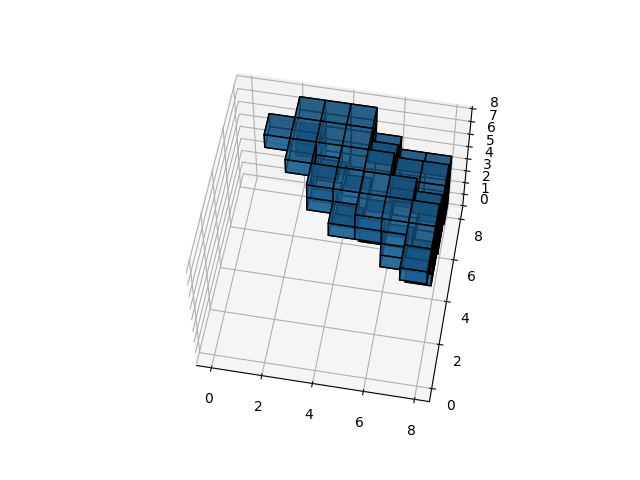

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# prepare some coordinates
x, y, z = np.indices((8, 8, 8))

# draw cuboids in the top left and bottom right corners, and a link between
# them
voxelarray = np.zeros_like(x)
for v in voxels:
    cube = (x == v[0]) & (y == v[1]) & (z == v[2])
    voxelarray |= cube

ax = plt.figure().add_subplot(projection='3d')
ax.voxels(voxelarray,  edgecolor='k', alpha=0.7);

In [68]:
cube1

array([[[ True,  True,  True, False, False, False, False, False],
        [ True,  True,  True, False, False, False, False, False],
        [ True,  True,  True, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False]],

       [[ True,  True,  True, False, False, False, False, False],
        [ True,  True,  True, False, False, False, False, False],
        [ True,  True,  True, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        